<a href="https://colab.research.google.com/github/gyunini/2022S-ML-/blob/main/HW3_201720736_%EC%9D%B4%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [4]:
cd drive

/content/drive


In [5]:
ls

MyDrive/  Shareddrives/


In [6]:
cd MyDrive

/content/drive/MyDrive


In [7]:
ls

 학교자료/   인공지능/  'Colab Notebooks'/   HW1/   HW3/


In [8]:
cd HW3

/content/drive/MyDrive/HW3


In [9]:
ls

heart_clean.csv  HW3_201720736_이균.ipynb


## 데이터 불러오기

In [41]:
import numpy as np
import pandas as pd

In [42]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [43]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


In [44]:
df.shape

(710, 6)

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [45]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 11)    # 710 * 0.9 = 639 -> 1/9(71)로 val data만듬/ 710 * 0.1 = 71 둘로 나눔 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 11)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [15]:
### 문제 1 ###
## 코드 작성 ##
from sklearn.neighbors import KNeighborsClassifier # (n_neighbors=5, *, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=None) 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

euclidean_train_acc = []
euclidean_val_acc = []

manhattan_train_acc = []
manhattan_val_acc = []

minkowski_train_acc = []
minkowski_val_acc = []

K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in K: # k는 3~10 반복
  # knn 객체 생성
  euclidean = KNeighborsClassifier(n_neighbors= i, metric = "euclidean") # p : int, default=2 Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
  manhattan = KNeighborsClassifier(n_neighbors= i, metric = "manhattan")
  minkowski = KNeighborsClassifier(n_neighbors= i, metric = "minkowski", p = 5) 

  # train data로 모델 만들기
  euclidean.fit(X_train, y_train)
  manhattan.fit(X_train, y_train)
  minkowski.fit(X_train, y_train)

  # 예측하기
  euclidean_X_train_result = euclidean.predict(X_train)
  manhattan_X_train_result = manhattan.predict(X_train)
  minkowski_X_train_result = minkowski.predict(X_train)

  euclidean_X_val_result = euclidean.predict(X_val)
  manhattan_X_val_result = manhattan.predict(X_val)
  minkowski_X_val_result = minkowski.predict(X_val)

  # 평가하기
  euclidean_train_acc.append(accuracy_score(euclidean_X_train_result, y_train))
  manhattan_train_acc.append(accuracy_score(manhattan_X_train_result, y_train))
  minkowski_train_acc.append(accuracy_score(minkowski_X_train_result, y_train))

  euclidean_val_acc.append(accuracy_score(euclidean_X_val_result, y_val))
  manhattan_val_acc.append(accuracy_score(manhattan_X_val_result, y_val))
  minkowski_val_acc.append(accuracy_score(minkowski_X_val_result, y_val))

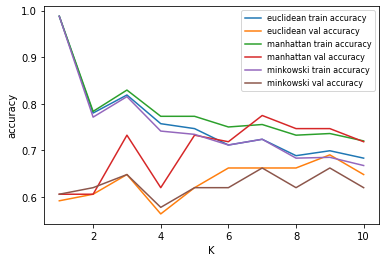

In [16]:
plt.figure()
plt.plot(K, euclidean_train_acc, label='euclidean train accuracy')
plt.plot(K, euclidean_val_acc, label='euclidean val accuracy')

plt.plot(K, manhattan_train_acc, label='manhattan train accuracy')
plt.plot(K, manhattan_val_acc, label='manhattan val accuracy')

plt.plot(K, minkowski_train_acc, label='minkowski train accuracy')
plt.plot(K, minkowski_val_acc, label='minkowski val accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend(loc='upper right', fontsize=8)

In [17]:
knn = KNeighborsClassifier(n_neighbors=7, metric = "manhattan")
knn.fit(X_train, y_train)
result = knn.predict(X_test)
accuracy_score(y_test, result)

0.704225352112676

**설명 작성**  
- 최적의 파라미터: 7
- 설명: manhattan 방식의 validation accuracy가 다른 방식 보다 높은것으로 보아 이 중에서 가장 accuracy가 높은 k값인  k = 7를 최적의 파라미터로 정하였다. 이후 k=7일때의 test accuracy는 위에서 보이는것과 같이 0.704이다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


In [18]:
### 문제 2 ###
## 코드 작성 ##
from sklearn.svm import SVC

rbf_train_acc=[]
rbf_val_acc=[]

poly_train_acc=[]
poly_val_acc=[]

sigmoid_train_acc=[]
sigmoid_val_acc=[]

C = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in C:
  rbf_svm = SVC(kernel='rbf', C=i).fit(X_train, y_train)
  poly_svm = SVC(kernel='poly', C=i).fit(X_train, y_train)
  sigmoid_svm = SVC(kernel='sigmoid', C=i).fit(X_train, y_train)

  rbf_X_train_result = rbf_svm.predict(X_train)
  poly_X_train_result = poly_svm.predict(X_train)
  sigmoid_X_train_result = sigmoid_svm.predict(X_train)

  rbf_X_val_result = rbf_svm.predict(X_val)
  poly_X_val_result = poly_svm.predict(X_val)
  sigmoid_X_val_result = sigmoid_svm.predict(X_val)

  rbf_train_acc.append(accuracy_score(rbf_X_train_result, y_train))
  poly_train_acc.append(accuracy_score(poly_X_train_result, y_train))
  sigmoid_train_acc.append(accuracy_score(sigmoid_X_train_result, y_train))

  rbf_val_acc.append(accuracy_score(rbf_X_val_result, y_val))
  poly_val_acc.append(accuracy_score(poly_X_val_result, y_val))
  sigmoid_val_acc.append(accuracy_score(sigmoid_X_val_result, y_val))

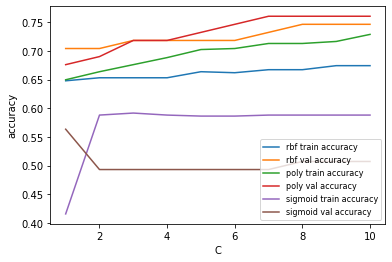

In [19]:
plt.figure()
plt.plot(C, rbf_train_acc, label='rbf train accuracy')
plt.plot(C, rbf_val_acc, label='rbf val accuracy')

plt.plot(C, poly_train_acc, label='poly train accuracy')
plt.plot(C, poly_val_acc, label='poly val accuracy')

plt.plot(C, sigmoid_train_acc, label='sigmoid train accuracy')
plt.plot(C, sigmoid_val_acc, label='sigmoid val accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(loc='lower right', fontsize=8)


In [57]:
svm = SVC(kernel='poly', C=10).fit(X_train, y_train)
result = svm.predict(X_test)
accuracy_score(y_test, result)

0.676056338028169

**설명 작성**  
- 최적의 파라미터: C = 10
- 설명: kernel이 poly일 때 validation accuracy가 제일 높다. 또한 C가 커질 수록 accuracy가 높아지는 경향이 있다. 따라서 이 때 C =10을 최적의 파라미터로 선정하였고, 최종 test accuracy는 0.67이 나왔다. 다만 SVM모델에서 C가 클 수록 margin이 hard해진다는 문제점이 있기 때문에 주의가 필요하다. 



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

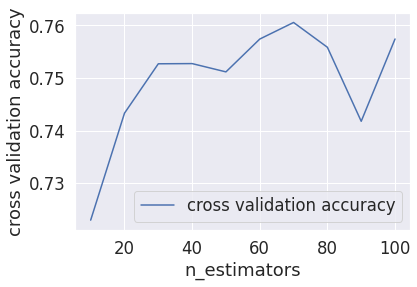

In [58]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 3)

N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
scores=[]

for i in N:
  rf_clf = RandomForestClassifier(n_estimators = i, max_depth = 10)
  cross_scores = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv=5)
  scores.append(np.mean(cross_scores))

plt.figure()
plt.plot(N, scores, label='cross validation accuracy')
plt.xlabel('n_estimators')
plt.ylabel('cross validation accuracy')
plt.legend()



In [65]:
rf = RandomForestClassifier(n_estimators = 70, max_depth = 10)  
rf.fit(X_train, y_train)
result = rf.predict(X_test)
accuracy_score(y_test, result)

0.8450704225352113

**설명 작성**  
- test accuracy: 0.845
- 최적의 파라미터: 70
- 설명: dataframe의 10% test data를 제외한 90%의 데이터로 5-fold를 진행하였다. RandonForest의 hyperparameter는 결정 트리의 개수인 n_estimators로 한 뒤에 5-fold cross validation했을 때 평균 성능을 각 파라미터별로 측정하였다. n_estimators가 많을 수록 좋은 성능을 기대할 수 있지만 계속 증가한다고 성능이 무조건 향상되는것이 아닌만큼 5-fold 했을때의 평균 정확도중 가장 높은 성능을 나타낸 parameter인 70을 최적의 파라미터로 결정하였고 다시 test accuracy를 측정했을 때 0.845정도의 성능이 나왔다.



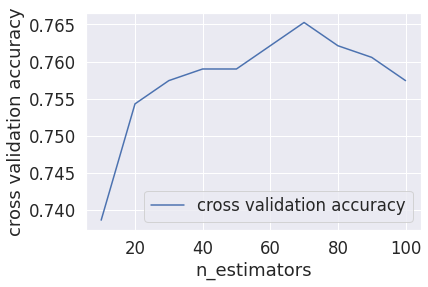

In [66]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
scores=[]

for i in N:
  rf_clf = RandomForestClassifier(random_state = 0, n_estimators = i, max_depth = 10)
  cross_scores = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv=loo)
  scores.append(np.mean(cross_scores))

plt.figure()
plt.plot(N, scores, label='cross validation accuracy')
plt.xlabel('n_estimators')
plt.ylabel('cross validation accuracy')
plt.legend()


In [67]:
rf = RandomForestClassifier(n_estimators = 70, max_depth = 10)  
rf.fit(X_train, y_train)
result = rf.predict(X_test)
accuracy_score(y_test, result)

0.8169014084507042

**설명 작성**  
- test accuracy: 0.81
- 최적의 파라미터: 70
- 설명: LOOCV방식을 이용해서 나온 평균 정확도를 hyperparameter에 따른 그래프로 그리면 위와 같은 그림이 나오고, 이때에 n_estimator = 70일 때에 정확도가 제일 높은것으로 보아 최적의 hyperparameter로 n_estimator = 70이라고 결정한 뒤에 다시 test accuracy를 계산 했을 때 0.78정도가 나왔다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [138]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [139]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [140]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [141]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

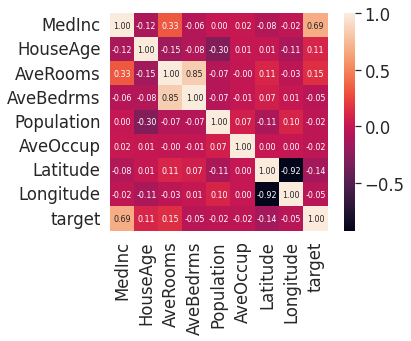

In [154]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import seaborn as sns

cols=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=cols, xticklabels=cols)

- **Feature들 간 관계 서술**  
  답: target과 관계가 있는 feature은 첫 번째로 MedInc, 두 번째로 AveRooms, 세 번째로 HouseAge라고 볼 수 있다. 나머지 feature은 음의 상관계수를 가지기 때문에 target과는 관련이 없다고 볼 수 있을것이다. 

- **최종 선택한 feature들**  
  답: MedInc, AveRooms, HouseAge

In [155]:
### 문제 4-1 ###
# 새 dataframe 만들기 
data_final = df[['MedInc', 'AveRooms', 'HouseAge', 'target']]
data_final.head()

,MedInc,AveRooms,HouseAge,target
0,8.3252,6.984127,41.0,4.526
1,8.3014,6.238137,21.0,3.585
2,7.2574,8.288136,52.0,3.521
3,5.6431,5.817352,52.0,3.413
4,3.8462,6.281853,52.0,3.422


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [165]:
### 문제 4-2 ###
## 코드 작성 ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data_final.drop('target', axis=1)
y = data_final['target']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 2)

lr = LinearRegression()
lr.fit(X_train, y_train)

result = lr.predict(X_train)
pred_train = pd.DataFrame(result,columns =['train predict'])
print(pred_train)
mse1 = mean_squared_error(y_train, result)
print('Train MSE : {0:.3f}'.format(mse1))
print('Train r2_score : {0:.3F}\n'.format(r2_score(y_train, result)))

y_preds = lr.predict(X_test)
test_preds = pd.DataFrame(y_preds,columns =['test predict'])
print(test_preds)
mse = mean_squared_error(y_test, y_preds)
print('Test MSE : {0:.3f}'.format(mse))
print('Test r2_score : {0:.3F}'.format(r2_score(y_test, y_preds)))

       train predict
0           2.752561
1           1.971474
2           1.556086
3           2.857933
4           0.922068
...              ...
18571       1.549215
18572       1.855126
18573       2.173762
18574       1.727511
18575       1.393176

[18576 rows x 1 columns]
Train MSE : 0.644
Train r2_score : 0.516

      test predict
0         2.908127
1         1.902322
2         1.223832
3         2.095147
4         3.517830
...            ...
2059      3.071905
2060      1.852006
2061      2.953320
2062      2.133000
2063      1.918288

[2064 rows x 1 columns]
Test MSE : 0.708
Test r2_score : 0.473


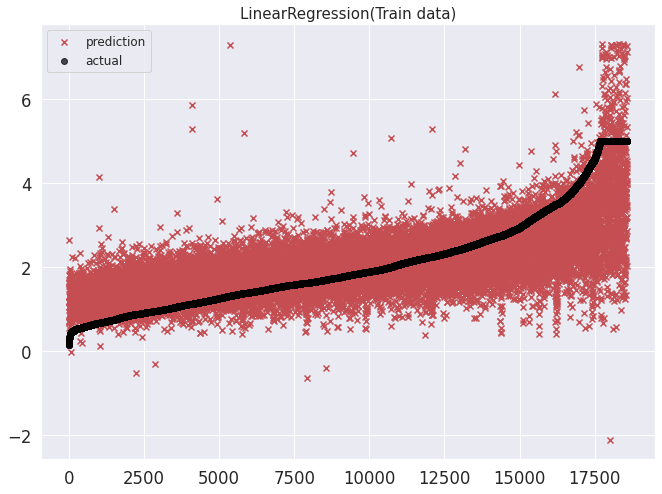

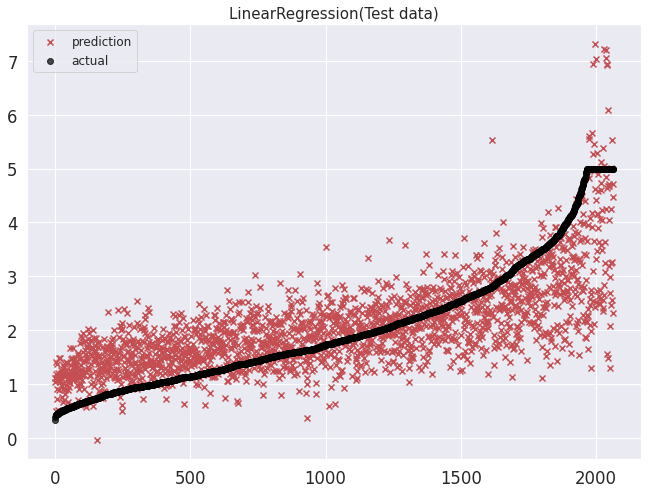

In [184]:
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

result = linear_reg.predict(X_train)
plot_predictions('LinearRegression(Train data)', result, y_train)

print('\n')

pred = linear_reg.predict(X_test)
plot_predictions('LinearRegression(Test data)', pred, y_test)

**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: train과 test에서의 MSE와 r2 score의 차이가 크지 않다. 또한 r2 score이 1에 가까울 수록 평균 대비 예측을 잘 하는것이고 0이면 예측을 딱 평균으로, 즉 예측을 못하는것인데 이 모델에서는 0.5 정도로 크게 높지 않다. 또한 Train에서는 mse가 test보다 상대적으로 작아서  r2가 상대적으로 test에서보다 큰 반면 test set에서는 반대 경향을 띄고있다. 즉 test set에서 r2값이 작다는것은 예측을 training set보다 못한다는것이고 이 말은 즉 모델이 overfitting 되었다고 볼 수 있다.



### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [170]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X = data_final.drop('target', axis=1)
y = data_final['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 3)

alpha = [0.0001, 0.001,0.01,0.1,10]
ridge_r2=[]
lasso_r2=[]

for i in alpha:
  #Ridge
  rr = Ridge(alpha=i)
  rr.fit(X_val, y_val)
  pred_train_rr= rr.predict(X_val)
  ridge_r2_score = r2_score(y_val, pred_train_rr)
  ridge_r2.append(ridge_r2_score)
  #Lasso
  model_lasso = Lasso(alpha=i)
  model_lasso.fit(X_val, y_val)
  pred_train_lasso= model_lasso.predict(X_val)
  lasso_r2_score = r2_score(y_val, pred_train_lasso)
  lasso_r2.append(lasso_r2_score)

[0.5241716509225406, 0.5241716509225268, 0.5241716509211369, 0.5241716507821645, 0.5241702521129026]
[0.5241716455781937, 0.5241711119295565, 0.5241177058454867, 0.5187766852349333, 0.0]


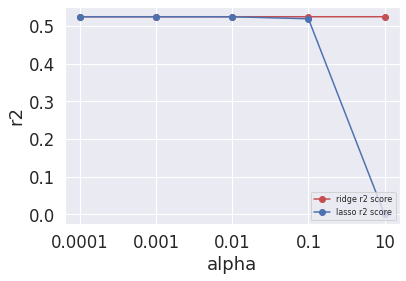

In [171]:
### 문제 4-3 ###
## 그래프 작성 ##
print(ridge_r2)
print(lasso_r2)
values = range(len(alpha))
plt.figure()
plt.plot(values, ridge_r2, label='ridge r2 score', c='r', marker='o')
plt.plot(values, lasso_r2, label='lasso r2 score', c='b', marker='o')

plt.xlabel('alpha')
plt.ylabel('r2')
plt.xticks(values,alpha)
plt.legend(loc='lower right', fontsize=8)

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

두 모델에서 모두 0.0001일 때 r2가 제일 높았다. 따라서 최적의 alpha값은 0.0001로 설정하였다.

In [172]:
### 문제 4-3 ###
# 최종 결과 출력
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

rr = Ridge(alpha=0.0001)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
pred_train_RR = pd.DataFrame(pred_train_rr,columns =['ridge'])
print('Ridge Train r2_score : {0:.3F}\n'.format(r2_score(y_train, pred_train_rr)))
pred_test_rr= rr.predict(X_test)
print('Ridge Test r2_score : {0:.3F}\n'.format(r2_score(y_test, pred_test_rr)))

print(pred_train_RR)

ls = Lasso(alpha=0.0001)
ls.fit(X_train, y_train) 
pred_train_ls= ls.predict(X_train)
pred_train_LS = pd.DataFrame(pred_train_ls,columns =['lasso'])
print('Lasso Train r2_score : {0:.3F}\n'.format(r2_score(y_train, pred_train_ls)))
pred_test_ls= ls.predict(X_test)
print('Lasso Test r2_score : {0:.3F}\n'.format(r2_score(y_test, pred_test_ls)))


print(pred_train_LS)

Ridge Train r2_score : 0.509

Ridge Test r2_score : 0.539

          ridge
0      2.234329
1      4.848416
2      2.538152
3      2.447386
4      2.694120
...         ...
18571  1.027494
18572  1.735742
18573  1.199714
18574  2.044013
18575  1.297503

[18576 rows x 1 columns]
Lasso Train r2_score : 0.509

Lasso Test r2_score : 0.539

          lasso
0      2.234264
1      4.848219
2      2.538133
3      2.447338
4      2.694084
...         ...
18571  1.027580
18572  1.735733
18573  1.199759
18574  2.043999
18575  1.297567

[18576 rows x 1 columns]


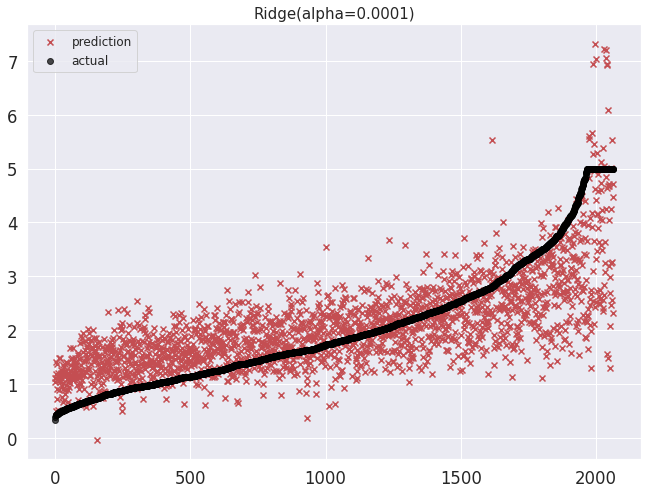

In [178]:
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
plot_predictions('Ridge(alpha=0.0001)', pred, y_test)

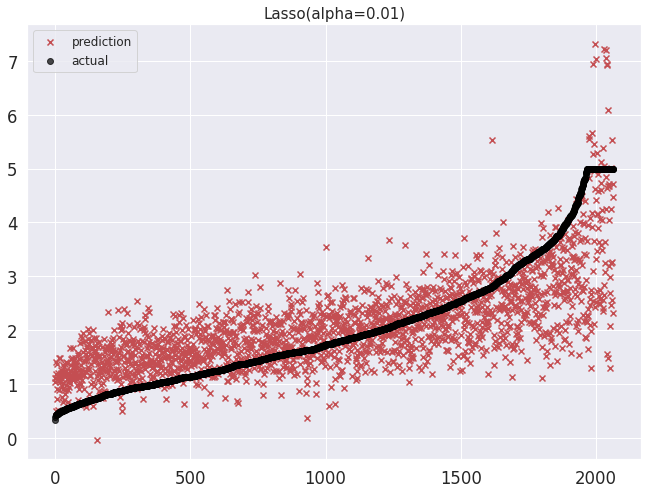

In [179]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
plot_predictions('Lasso(alpha=0.01)', pred, y_test)